In [60]:
import pydicom as dicom
from PIL import Image
import numpy as np
import os

def loader(file_path):
    images = []
    for file in os.listdir(file_path):
        if '.dcm' in file:
            img_path = file_path+'\\'+file
            img_dicom = dicom.dcmread(img_path)
            img_array  = img_dicom.pixel_array
            images.append(img_array)
    return images

images = loader('series-00000')
images[0].shape

(512, 512)

In [61]:
imag_array = images[0]
img_pil = Image.fromarray(img_array)
img_pil.show()

#są takie same
(img_array == np.array(img_pil)).all()

True

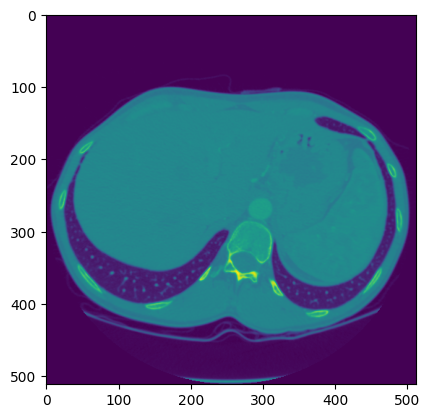

In [62]:
import matplotlib.pylab as plt
plt.imshow(img_array)

In [63]:
def select_slice_pad(img_array,center,n):
    img_array_pad = np.pad(img_array,n,'edge')
    center_x = center[0]+n
    center_y = center[1]+n
    return img_array_pad[center_x-n:center_x+n+1,center_y-n:center_y+n+1]

def select_slice(img_array,center,n):
    center_x = center[0]
    center_y = center[1]
    return img_array[center_x-n:center_x+n+1,center_y-n:center_y+n+1]

(21, 21)


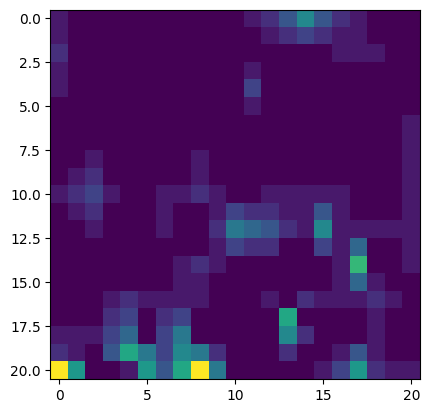

In [64]:
a = select_slice(img_array,(100,100),10)
print(a.shape)
plt.imshow(a)

(21, 21)


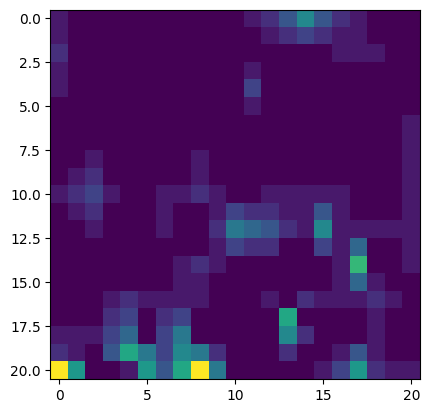

In [65]:
a = select_slice_pad(img_array,(100,100),10)
print(a.shape)
plt.imshow(a)